# Решение жесткой краевой задачи методом прогонки

Задача: построить общее решение дифференциального уравнения:
$$
    y'' - (10 + x) y = x e^{-x}, \quad 0 < x < 10
$$


Задача типовая. Необходимо задать любой линейно-независимый набор краевых условий, и решить систему для них 
(аналогично задаче из кр). Особенность данной задачи в том, что она жесткая. Рассматривая родственное 
(коэффициенты остаются примерно равными, это некоторый аналог метода замороженных коэффициентов) уравнение:
$$
    y'' - 10 y = x e^{-x}, \quad 0 < x < 10
$$
мы находим, что $y \approx C_1 e^{\sqrt{10}x} +  C_2 e^{ - \sqrt{10} x}$. $e^{10\sqrt{10}} >> 1$, поэтому 
задавать краевые условия необходимо аккуратно: если данному краевому условию будет соответствовать сумма растущего
    и убывающего решений с примерно одинаковыми коэффициентами, то возникнет приграничный слой, 
    в котором решение очень быстро изменяется. А это дает огромную погрешность расчетов. Ниже мы приведем пример такого случая.

Кроме того, из сущноста метода прогонки, одно краевое условие должно быть на левом конце, а другое - на правом.
Учтем это.

Будем решать задачу методом прогонки. В домашнем задании было показано, что выполняется условие диагонального 
преобладания для данной системы для любого шага. Условие тем хуже выполняется, чем меньше шаг $h$. Поэтому, 
учитывая конечную машинную точность, слишком мельчить с шагом тоже нельзя: решение развалится. 
    Ниже тоже приведем примеры таких случаев. 

Учитывая большую жесткость задачи, для поиска ФСР однородного уравнения, зададим для растущего решения 
краевые условия как:
    
$$
    y(0) = 0; \quad y'(1) = 1
$$

А для убывающего как:

$$
     y(0) = 1; \quad y'(1) = 0
$$

Важно отметить, что оба решения начинать просчитывать с быстрорастущего участка по прямому ходу метода прогонки ведет к большим погрешностям. Поэтому растущее решение следует считать слева направо, а убывающее - справа налево (речь идет о направлении прямого хода метода прогонки)

Для поиска частного решения зададим краевые условия как:
    
$$
    y(0) = 0; \quad y'(1) = 1
$$

Правая часть является менее жесткой, поэтому с ней таких проблем не возникает. Считаем слева направо, поскольку именно слева правая часть равна 0 в точности. Достаточно точно задать правую часть на правом конце сложно. А ошибка будет расти экспоненциально 

Графики приведены ниже. Система линейных уравнений имееет вид:
    
$$
    a_n y_{n+1} - b_n y_n + c_n y_{n-1} = d_n, \quad n \in {1, 2, ..., N}
$$

$$
    N = \frac{b - a}{h}
$$

Аппроксимация производной на краю, чтобы сохранить второй порядок (делается стандартно, как и в других задачах задания):

$$
    y_N = \frac{Q_N + y'(1) h}{1 + 10 h^2 - P_N}
$$

Прогоночное соотношение для расчета слева направо:

$$
        P_{n+1} = \frac{c_n}{b_n - a_n P_n}, \quad Q_{n+1} = \frac{a_n Q_n - d_n}{b_n - a_n P_n}
$$

При решении однородного уравнения полагаем $d_n = 0$ всюду, за исключением, может быть, краевых точек, которые необходимо рассматривать отдельно.

В начале прямого хода:

$$
            P_1 = \frac{c_0}{b_0}, \quad Q_1 = - \frac{d_0}{b_0}
$$

По окончании прямого хода мы выражаем значение $y_n$ на данном конце, и запускаем обратный ход (все стандартно). Для хода справа налево - аналогично.

In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
def coeff(x, N, h):
    # возвращаем [a, b, c, d]
    # a_n * x_(n+1) - b_n * x_n + c_n * x_{n_1} = d_n
    
    a = np.ones(N + 1)
    c = np.ones(N + 1)
    d = h * h * x * np.exp(-x)
    
    return [a, 2 + (10 + x) * h * h, c, d]

In [12]:
#Определим фукнцию, реализующую алгоритм прогонки
def run(h, type):
    
    a = 0
    b = 10
    N = round((b - a) / h)

    y = np.empty(N + 1)
    x = np.arange(a, b + h, h)
    
    P = np.empty(N + 1)
    Q = np.empty(N + 1)
    
    [a, b, c, d] = coeff(x, N, h)
    
    # решаем однородное уравнение слева направо. Задача жесткая, поэтому ищем монотонное решение
    # Используем условие y(a) = 0, y'(b) = 1
    if type == "g":
        #y[0] = 0
        #y[1] = y[0] * (1 - 5 * h * h)+ h
        
        a[0] = 0
        c[0] = 0
        d[0] = 0
        b[0] = 1
        
        P[1] = a[0] / b [0]
        Q[1] = - d[0] / b [0]
        
        # ход прогонки сверху вниз
        for n in range(1, N):
            P[n + 1] = a[n] / ( b[n] - c[n] * P[n] )
            Q[n + 1] = (c[n] * Q[n] - 0) / ( b[n] - c[n] * P[n])
            #print(N, n, P[n], Q[n], a[n], b[n], c[n])
        
        # аппрксимируем производную на правом конце
        y[N] = (h + Q[N]) / (1 + 10 * h * h + P[N])
        #print(y[N])
        
        
        # обратный ход прогонки
        for n in range(N - 1, 1, -1):
            y[n] = P[n + 1] * y[n + 1] + Q[n + 1]
    
    
    # Используем условие y'(b) = 0, y(a) = 1. Теперь придется решать справа налево, чтобы
    # аккуратно пройти пограничный слой
    elif type == "d":
        #y[0] = 1
        
        a[N] = 0
        c[N] = -1
        d[N] = 0
        b[N] = 1 + 10 * h * h
        
        P[N] = b[N] / c[N]
        Q[N] = d[N] / c[N]
        
        # ход прогонки сверху вниз
        for n in range(N - 1, 0, -1):
            P[n] = ( b[n] - a[n] / P[n + 1] ) / c[n]
            Q[n] = a[n] * Q[n + 1] / c[n] / P[n + 1]
            #print(N, n, P[n], Q[n], a[n], b[n], c[n])
        
        y[0] = 1
        #print(y[N])
        #y[N] = 10
        
        # обратный ход прогонки
        for n in range(1, N):
            y[n] = (y[n - 1] - Q[n])/P[n]
      
    # Ищем частное решение неоднородного уравнения. Слева направо, потому что на левом конце правая часть = 0
    # точно. А на правом конце получается с большой погрешностью.
    elif type == "zz":
        a[0] = 0
        c[0] = 0
        d[0] = 0
        b[0] = 1
        
        P[1] = a[0] / b [0]
        Q[1] = - d[0] / b [0]
        
        # ход прогонки сверху вниз
        for n in range(1, N):
            P[n + 1] = a[n] / ( b[n] - c[n] * P[n] )
            Q[n + 1] = (c[n] * Q[n] - d[n]) / ( b[n] - c[n] * P[n])
            #print(N, n, P[n], Q[n], a[n], b[n], c[n])
        
        # аппрксимируем производную на правом конце
        y[N] = (h + Q[N]) / (1 + 10 * h * h + P[N])
        #print(y[N])
        
        
        # обратный ход прогонки
        for n in range(N - 1, 1, -1):
            y[n] = P[n + 1] * y[n + 1] + Q[n + 1]
              
    return [x, y, h]

In [13]:
def make_graph(x, y, h, title):
    
    fig = plt.figure(figsize = (12, 9))
    ax = fig.add_subplot(111)
    #plt.plot(arg, val)
    
    l = 2.
    f = 20
    
    # строим решение для данного шага
    ax.plot(x, y, color="red", linewidth = l, label="h = " + str(h))
    
    ax.grid(True)
    ax.legend(fontsize = f)
    plt.title(title, fontsize = f)
 
    plt.show() 

In [14]:
def num_sol(h, title, type):
    sol = run(h, type)
    make_graph(sol[0], sol[1], h, title)

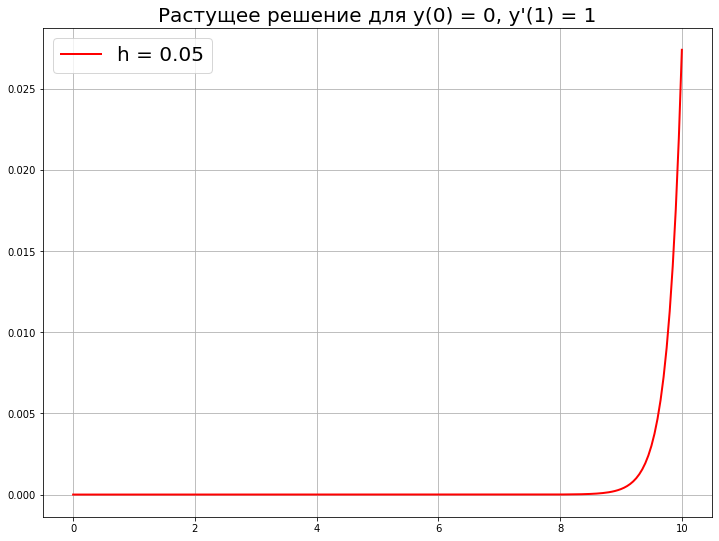

In [20]:
num_sol(.05, "Растущее решение для y(0) = 0, y'(1) = 1", "g")

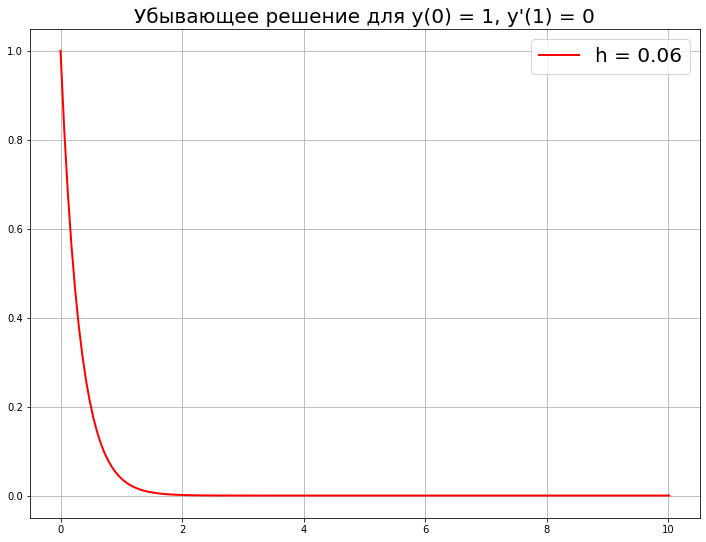

In [22]:
num_sol(.06, "Убывающее решение для y(0) = 1, y'(1) = 0", "d")

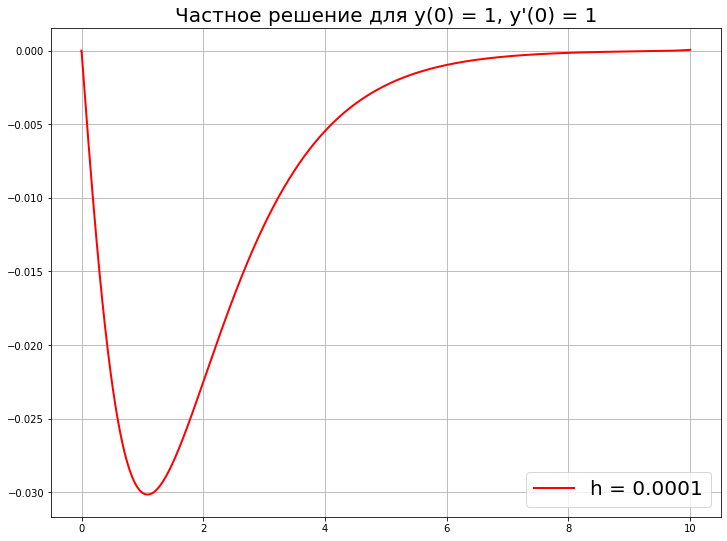

In [25]:
num_sol(.0001, "Частное решение для y(0) = 1, y'(0) = 1", "zz")

Можно поэкспериментировть с шагами. Графики приведены ниже.

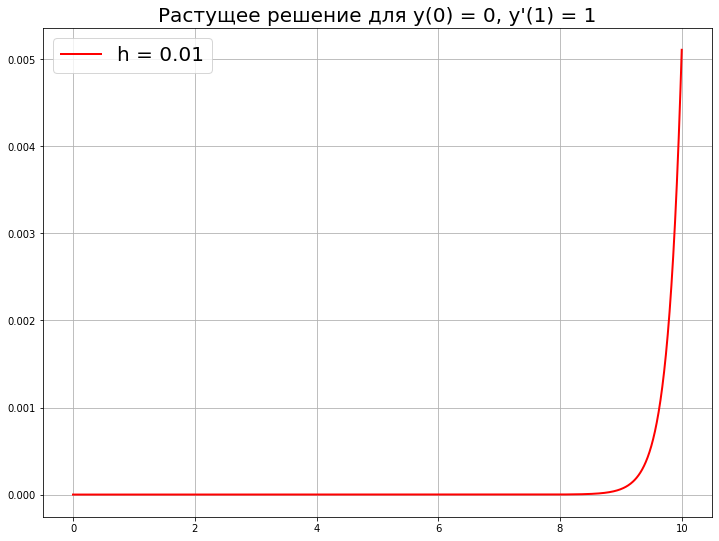

In [27]:
num_sol(.01, "Растущее решение для y(0) = 0, y'(1) = 1", "g")

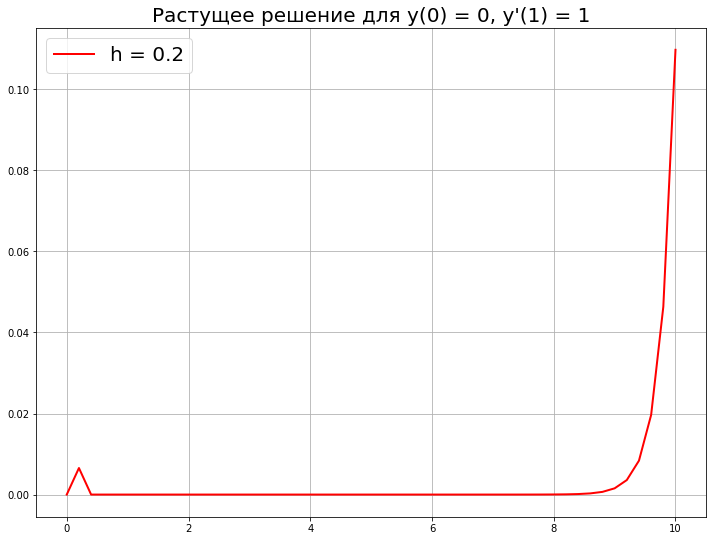

In [32]:
num_sol(.2, "Растущее решение для y(0) = 0, y'(1) = 1", "g")

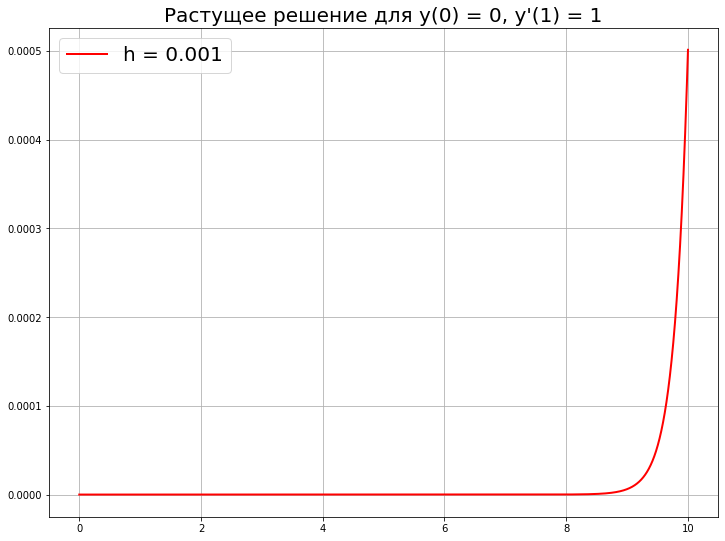

In [34]:
num_sol(.001, "Растущее решение для y(0) = 0, y'(1) = 1", "g")

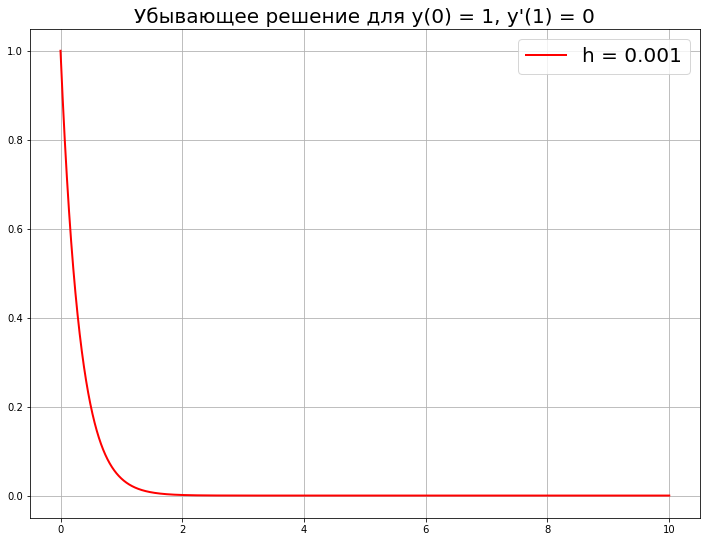

In [36]:
num_sol(.001, "Убывающее решение для y(0) = 1, y'(1) = 0", "d")

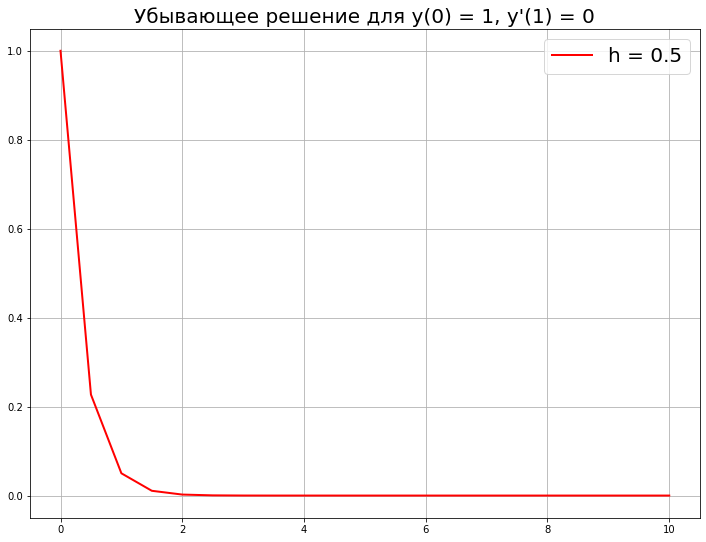

In [38]:
num_sol(.5, "Убывающее решение для y(0) = 1, y'(1) = 0", "d")

# Вывод

Построенный метод нахождения общего решения оказывается достаточно устойчивым. Лишь при слишком малых шагах могут 
возникать некоторые неустойчивости. Впрочем, не очень большие.

Графики ФСР однородного уравнения и частного решения неоднородного уравнения приведены в работе